In [1]:
import numpy as np
import pytorch_network
import torch
from torch import nn
import tqdm

from utils import get_aligned_representations
from information_process import get_information
from plot_information import plot_information_plane
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = pytorch_network.MLPWithInfo(output_activation=None)

In [3]:
model

MLPWithInfo(
  (model): ModuleList(
    (0): Linear(in_features=12, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=7, bias=True)
    (3): Tanh()
    (4): Linear(in_features=7, out_features=5, bias=True)
    (5): Tanh()
    (6): Linear(in_features=5, out_features=4, bias=True)
    (7): Tanh()
    (8): Linear(in_features=4, out_features=3, bias=True)
    (9): Tanh()
    (10): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [4]:
model.info_layers_numbers

[1, 3, 5, 7, 9, 11]

In [5]:
X, y = pytorch_network.load_tishby_toy_dataset('./data/g1.mat')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9)

In [6]:
epochs = 100
train_res = pytorch_network.train_network(model, X_train, y_train.astype(np.int),
                                          X_test, y_test.astype(np.int), batch_size=12, epochs=epochs)

100%|██████████| 100/100 [00:35<00:00,  2.88it/s]


Restore original ordering of samples, align with input/output

In [7]:
ws = model.representations_per_epochs
order = train_res[2]

ws = get_aligned_representations(ws, order)

In [8]:
assert len(model.representations_per_epochs) == epochs
assert len(model.representations_per_epochs[0]) == len(model.info_layers_numbers)

for i in range(len(model.representations_per_epochs[0])):
    assert(model.representations_per_epochs[0][i].shape[0] == X_train.shape[0])

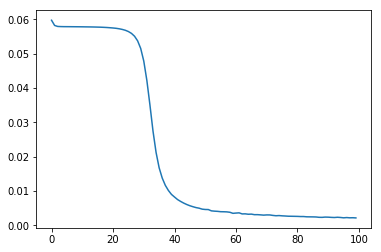

In [9]:
plt.plot(np.arange(len(train_res[0])), train_res[0])

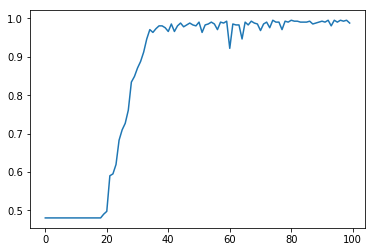

In [10]:
plt.plot(np.arange(len(train_res[1])), train_res[1])

In [11]:
num_of_bins = 40
every_n = 10
IXT_array, ITY_array = get_information(ws, X_train, np.concatenate([y_train, 1 - y_train], axis=1), 
                                       num_of_bins, every_n=every_n, return_matrices=True)

In [12]:
import importlib

In [13]:
import plot_information

In [14]:
importlib.reload(plot_information)

<module 'plot_information' from '/Users/kochka/.yandex.disk/381025959/Yandex.Disk.localized/skoltech/large scape opt/project/pytorch_idnn/plot_information.py'>

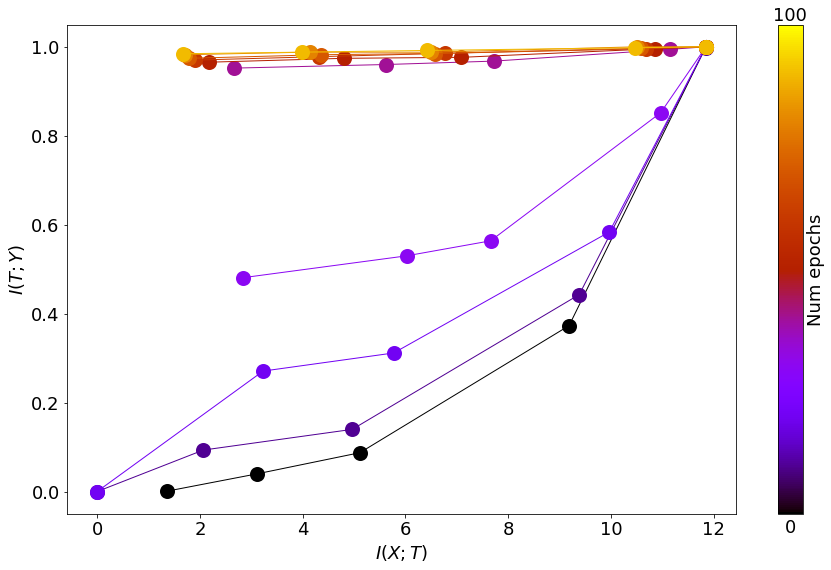

In [15]:
plot_information.plot_information_plane(IXT_array, ITY_array, num_epochs=epochs, every_n=every_n)